In [1]:
import os
from psaw import PushshiftAPI 
import pandas as pd
import time
import datetime
import re 
import matplotlib.pyplot as plt
import geopandas as gpd
import calendar

In [2]:
address = str(os.getcwd()) + '/data/'


hardwareswapraw = pd.read_csv (r'' + address +'hardware_swap_data.csv')

/home/north45/Programs/Anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/north45/Programs/Anaconda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (67,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,...,treatment_tags,upvote_ratio,url,whitelist_status,wls,created,removed_by_category,author_cakeday,edited,banned_by
0,[],False,ellio3,NaN,Grade4,"[{'e': 'text', 't': 'Trades: 29'}]",Trades: 29,dark,richtext,t2_1omue25y,...,[],1.0,https://www.reddit.com/r/hardwareswap/comments...,all_ads,6,1.619839e+09,NaN,NaN,NaN,NaN
1,[],False,TheGreenInsurgent,NaN,Grade2,"[{'e': 'text', 't': 'Trades: 5'}]",Trades: 5,dark,richtext,t2_2vfz0xj9,...,[],1.0,https://www.reddit.com/r/hardwareswap/comments...,all_ads,6,1.619839e+09,NaN,NaN,NaN,NaN
2,[],False,w3lmatatan,NaN,Grade4,"[{'e': 'text', 't': 'Trades: 34'}]",Trades: 34,dark,richtext,t2_gguqm,...,[],1.0,https://www.reddit.com/r/hardwareswap/comments...,all_ads,6,1.619839e+09,NaN,NaN,NaN,NaN
3,[],False,stickytingus,NaN,Grade2,"[{'e': 'text', 't': 'Trades: 9'}]",Trades: 9,dark,richtext,t2_3rooo3i8,...,[],1.0,https://www.reddit.com/r/hardwareswap/comments...,all_ads,6,1.619839e+09,NaN,NaN,NaN,NaN
4,[],False,fewsiic,NaN,NaN,[],NaN,NaN,text,t2_10vruq,...,[],1.0,https://www.reddit.com/r/hardwareswap/comments...,all_ads,6,1.619839e+09,NaN,NaN,NaN,NaN


In [ ]:
# crate reduced data and convert epoch time to regular date format

In [3]:
hardwareswapred =  hardwareswawpraw[['title', 'selftext', 'created_utc']]

hardwareswapred['date'] = pd.to_datetime(hardwareswapred['created_utc'], unit='s')

/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# extract location information (state)

In [4]:
hardwareswapred['State'] =  hardwareswapred['title'].str.extract('(\[USA\s*-\s*\w{2}\])', expand=True)


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
hardwareswapred['State'] =hardwareswapred['title'].str.extract('(-\s*\w{2})', expand=True)


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
hardwareswapred['State'] = hardwareswapred['State'].str.replace('-', '')


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# extract information about what is offered in postings

In [7]:
hardwareswapred['sellItem'] = hardwareswapred['title'].str.extract('(.*?)', expand=True)


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
hardwareswapred['sellItem'] = hardwareswapred['title'].str.extract('(H\s*\](.*?)\[)', expand=True)


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
hardwareswapred['sellItem'] = hardwareswapred['sellItem'].str.replace('H\]', '')


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
hardwareswapred['sellItem'] = hardwareswapred['sellItem'].str.replace('\[', '')


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# extract information about what is being asked in postings

In [11]:
hardwareswapred['getItem'] = hardwareswapred['title'].str.extract('(.*?)', expand=True)


/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
hardwareswapred['getItem']  = hardwareswapred['title'].str.split('W\s*\]').str[-1]

/home/north45/Programs/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
hardwareswapred = hardwareswapred[hardwareswapred['sellItem'].notna()]
hardwareswapred = hardwareswapred[hardwareswapred['State'].notna()]


In [ ]:
# Supply postings volume by month

In [14]:
hardwareswapSell3080 = hardwareswapred[hardwareswapred['sellItem'].str.contains('3080')]

In [15]:
hardwareswapred3080dateSell = hardwareswapSell3080['date'].dt.to_period('M').value_counts().sort_index().to_frame().reset_index()
hardwareswapred3080dateSell = hardwareswapred3080dateSell.rename(columns = {'index' : 'date_sell', 'date' : 'date_count_sell'})
hardwareswapred3080dateSell['date_mod_sell'] = (hardwareswapred3080dateSell['date_sell'].dt.year.astype(str) + ', '
                                           + hardwareswapred3080dateSell['date_sell'].dt.month.apply(lambda x: calendar.month_name[x]).astype(str))


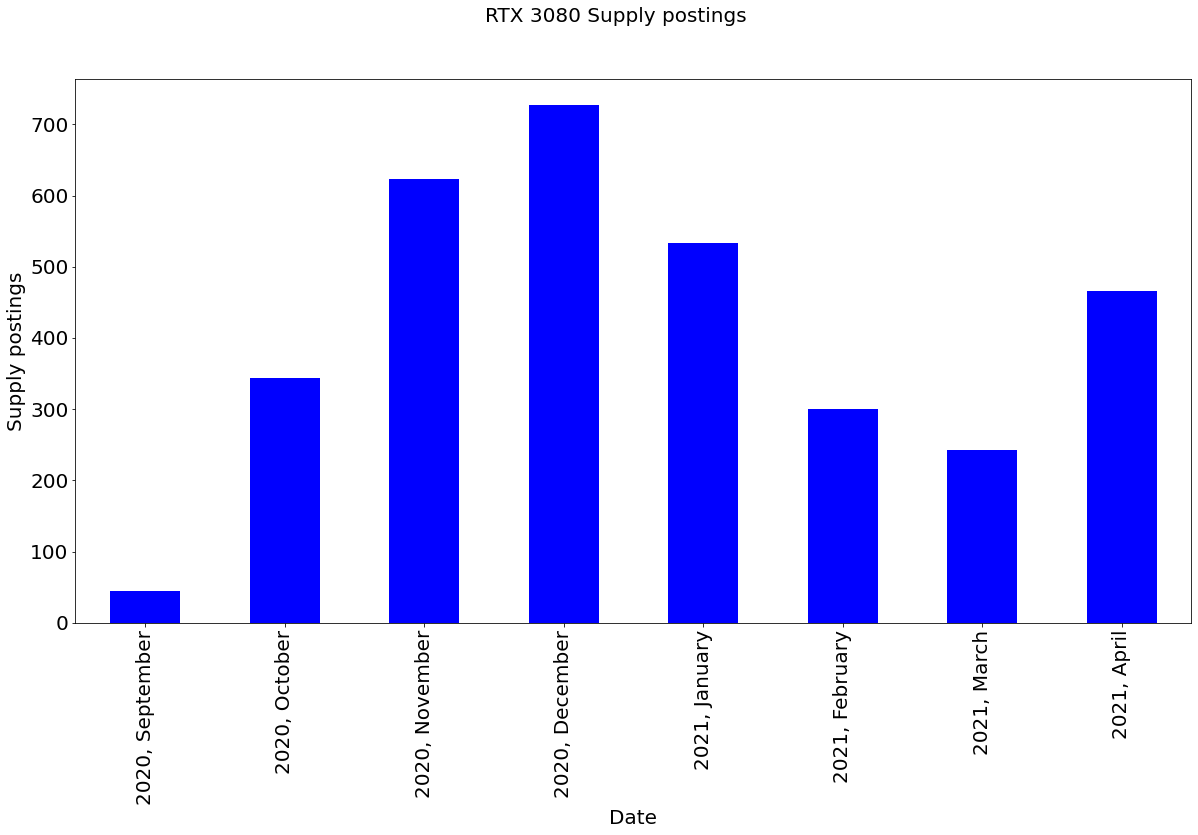

In [16]:
fig3080Sell = hardwareswapred3080dateSell.plot(x = 'date_mod_sell', y = 'date_count_sell', kind = 'bar',
                                            figsize=(20, 10), fontsize=20, 
                                               legend = False, color = 'blue').get_figure()


fig3080Sell.suptitle('RTX 3080 Supply postings', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Supply postings', fontsize=20)
fig3080Sell.savefig('3080_supply_date.png')

In [17]:
# Demand postings  volume by month

In [18]:
hardwareswapBuy3080 = hardwareswapred[hardwareswapred['getItem'].str.contains('3080')]
hardwareswapBuy3080.head()

,title,selftext,created_utc,date,State,sellItem,getItem
3,[USA - CA] [H] AMD Sapphire Nitro+ Radeon RX 6...,I have an AMD Sapphire Nitro+ Radeon RX 6700 X...,1618530358,2021-04-15 23:45:58,CA,AMD Sapphire Nitro+ Radeon RX 6700 XT 12GB,"Nvidia 3060 Ti, 3070, or 3080"
9,"[USA-NY] [H] Local Cash, Zotac 2060 Twin Edge ...",Looking to buy either a RTX 3070 or RTX 3080 c...,1618529725,2021-04-15 23:35:25,NY,"Local Cash, Zotac 2060 Twin Edge",RTX 3070 / RTX 3080
20,[USA-TN] [H] Paypal [W] New gen gpu 3070/3080 ...,"Looking for a new gen gpu, willing to negotiat...",1618528929,2021-04-15 23:22:09,TN,Paypal,New gen gpu 3070/3080 any 6000xt series
25,USA - CA] [H] AMD Sapphire Nitro+ Radeon RX 67...,I have an AMD Sapphire Nitro+ Radeon RX 6700 X...,1618528756,2021-04-15 23:19:16,CA,AMD Sapphire Nitro+ Radeon RX 6700 XT 12GB,"Nvidia 3060 Ti, 3070, or 3080"
44,[USA-MS] [H] Gigabyte Aorus gtx 1070 eGPU + ca...,NaN,1618527162,2021-04-15 22:52:42,MS,Gigabyte Aorus gtx 1070 eGPU + cash,"rtx 3070, 3080, or 3090"


In [19]:
hardwareswapred3080dateBuy = hardwareswapBuy3080['date'].dt.to_period('M').value_counts().sort_index().to_frame().reset_index()
hardwareswapred3080dateBuy = hardwareswapred3080dateBuy.rename(columns = {'index' : 'date_buy', 'date' : 'date_count_buy'})
hardwareswapred3080dateBuy['date_mod_buy'] = (hardwareswapred3080dateBuy['date_buy'].dt.year.astype(str) + ', '
                                           + hardwareswapred3080dateBuy['date_buy'].dt.month.apply(lambda x: calendar.month_name[x]).astype(str))


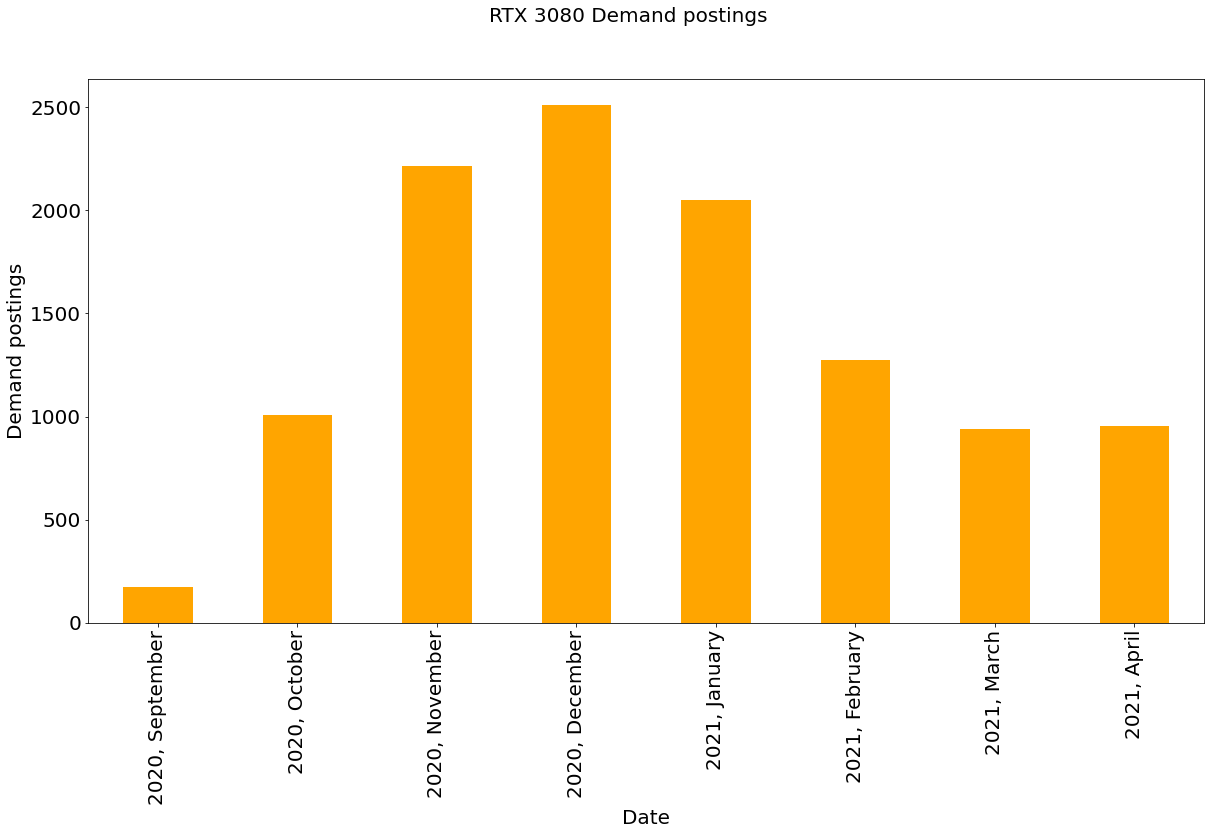

In [20]:
fig3080Buy = hardwareswapred3080dateBuy.plot(x = 'date_mod_buy', y = 'date_count_buy', kind = 'bar',
                                             color = 'orange',figsize=(20, 10), 
                                             fontsize=20, legend = False).get_figure()


fig3080Buy.suptitle('RTX 3080 Demand postings', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Demand postings', fontsize=20)
fig3080Buy.savefig('3080_demand_date.png')

In [21]:
# Supply to demand ratio volume by month

In [22]:
hardwareswapred3080dateDemand = pd.DataFrame()
hardwareswapred3080dateDemand['date'] = hardwareswapred3080dateSell['date_mod_sell']
hardwareswapred3080dateDemand['suppplyToDemand'] = hardwareswapred3080dateSell['date_count_sell']/ hardwareswapred3080dateBuy['date_count_buy']

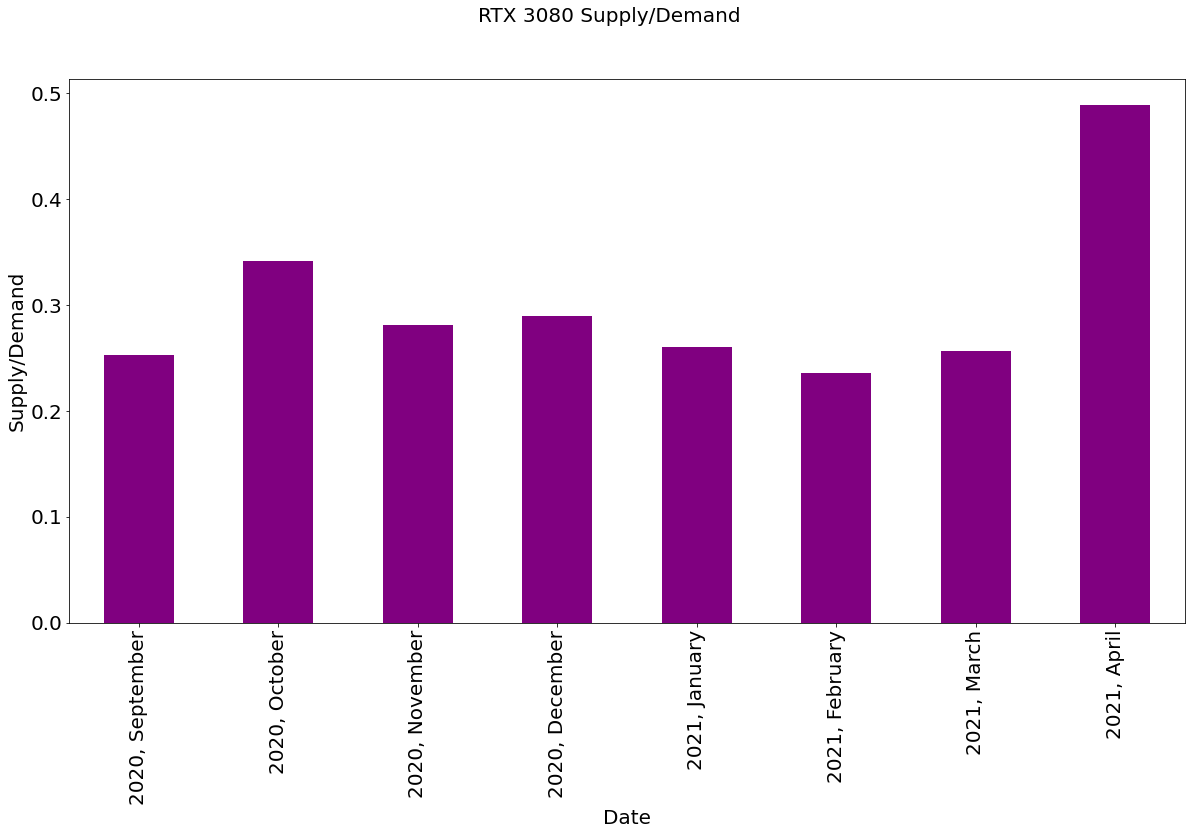

In [23]:
fig3080StoD = hardwareswapred3080dateDemand.plot(x = 'date', y = 'suppplyToDemand', kind = 'bar',
                                            figsize=(20, 10), color = 'purple',
                                                 fontsize=20, legend = False).get_figure()


fig3080StoD.suptitle('RTX 3080 Supply/Demand', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Supply/Demand', fontsize=20)
fig3080Buy.savefig('3080_demand_to_supply_date.png')